In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Transforming the Gender column to numerical

In [5]:
df['Genre'] = df['Genre'].map({'Female':0,"Male":1})

#### Dropping the customerID column because it has no affect on the customer segmentation

In [6]:
df.drop(labels = 'CustomerID',axis=1,inplace=True)

In [7]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#### Normalizing the dataset so that it divides the clusters perfectly

In [8]:
st = StandardScaler()
df_scaled = st.fit_transform(df)

#### Generating the within cluster sum of squares

In [9]:
wcss = []
for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit(df_scaled)
    wc = km.inertia_
    wcss.append(wc)
print(wcss)

[799.9999999999999, 588.8026767824936, 487.49629667502916, 386.7147857740688, 325.74623385425576, 275.95798925040367, 239.2228510008964, 199.7847820892608, 174.19309570857692, 152.11801327614117, 140.91232328790085, 127.29849356947425, 119.01810971264423, 108.76939834606992, 99.2720570475525, 95.3136576309309, 87.81827356079354, 84.17742018569339, 77.2938669804731]


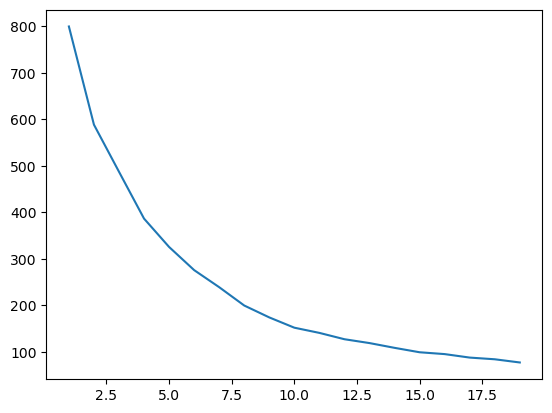

In [10]:
plt.plot(range(1,20),wcss)

In [21]:
#pip install kneed

In [12]:
from kneed import KneeLocator

In [13]:
kl=KneeLocator(range(1,20),wcss,curve="convex",direction="decreasing")

In [14]:
kl.elbow

6

#### From the elbow curve, we got 6 clusters as our optimum value

In [15]:
kmm = KMeans(n_clusters=6)
y_pred = kmm.fit_predict(df_scaled)

In [16]:
df['cluster'] = y_pred

In [17]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]
df5 = df[df['cluster']==4]
df6 = df[df['cluster']==5]

### Graphical representation using silhoutte score

For n_clusters = 2 The average silhouette_score is : 0.2518152915788437
For n_clusters = 3 The average silhouette_score is : 0.25951265087431563
For n_clusters = 4 The average silhouette_score is : 0.3016237438985174
For n_clusters = 5 The average silhouette_score is : 0.31737681722473354
For n_clusters = 6 The average silhouette_score is : 0.33120749580891584
For n_clusters = 7 The average silhouette_score is : 0.3546854160476254
For n_clusters = 8 The average silhouette_score is : 0.38733199737864654
For n_clusters = 9 The average silhouette_score is : 0.4025192944683836


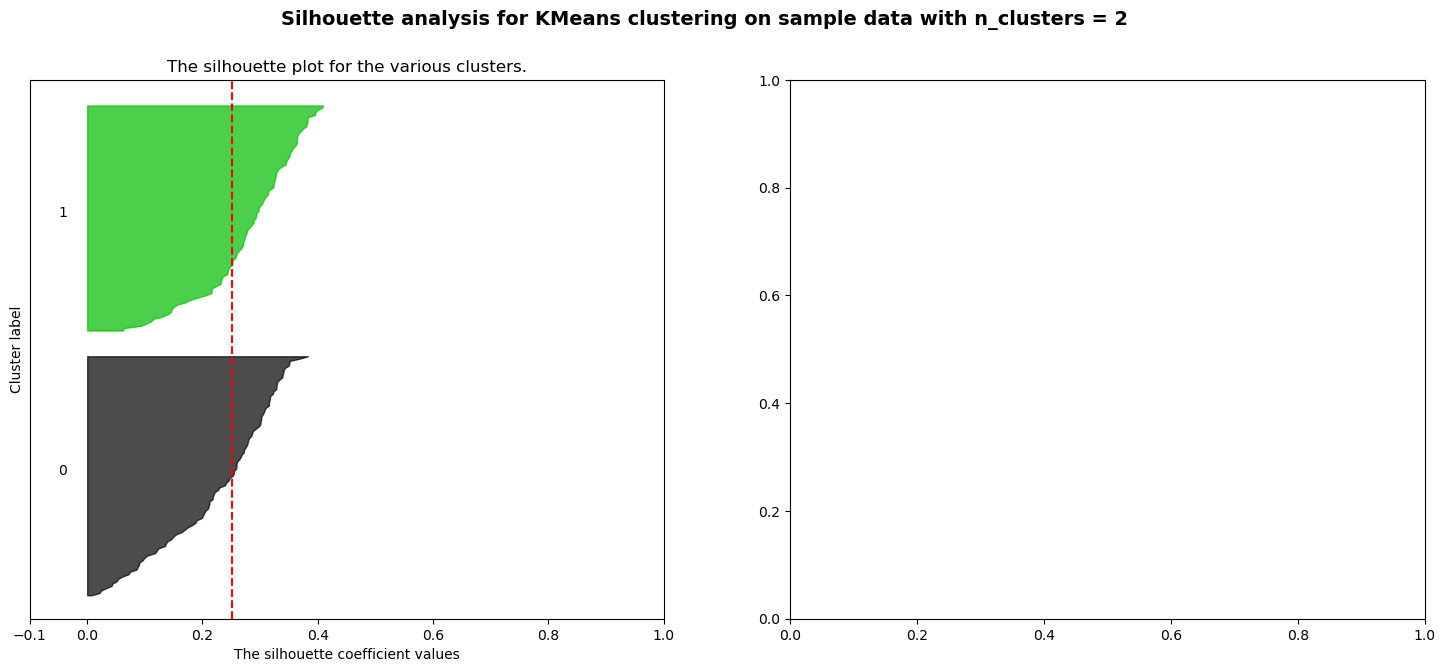

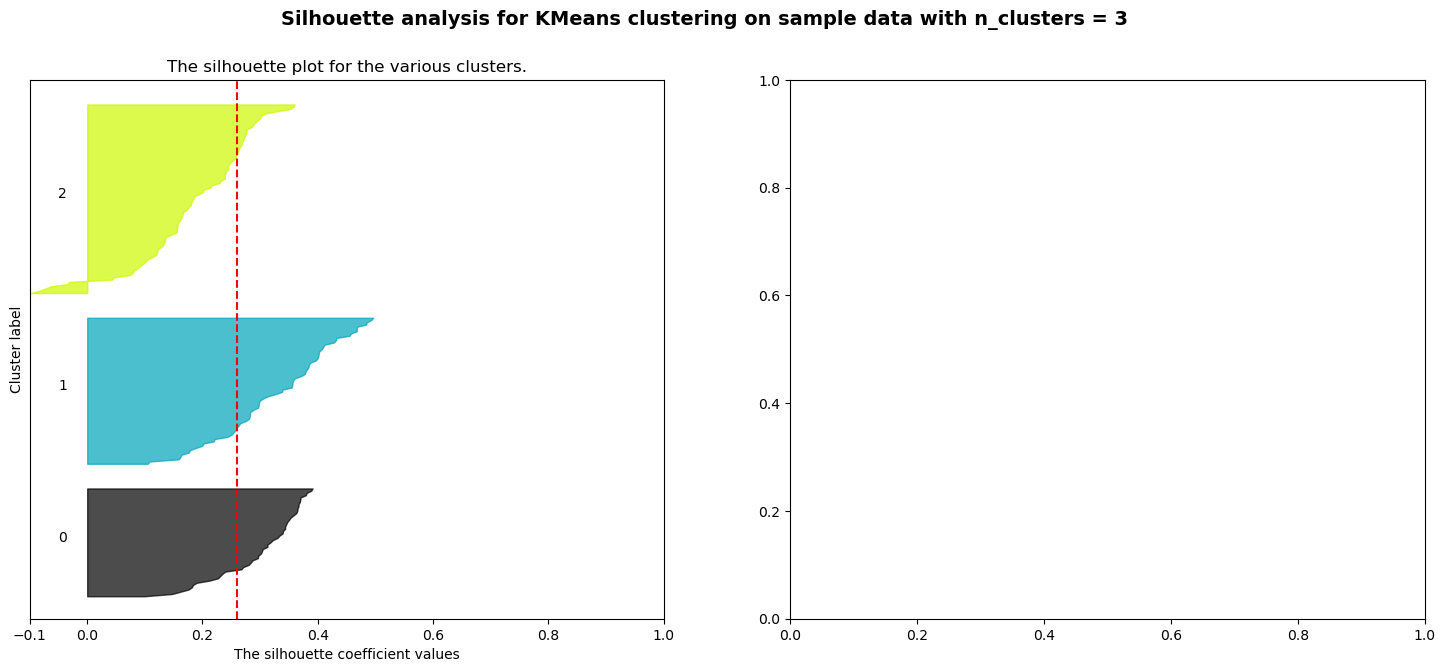

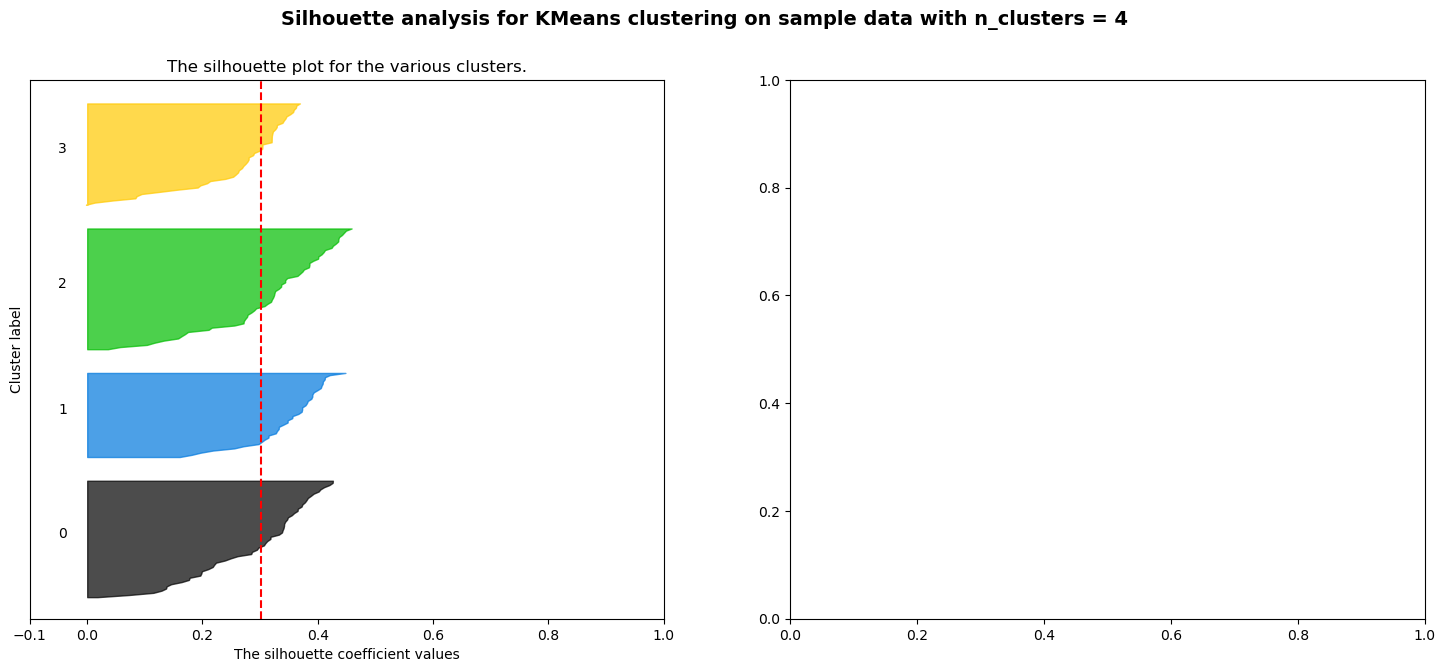

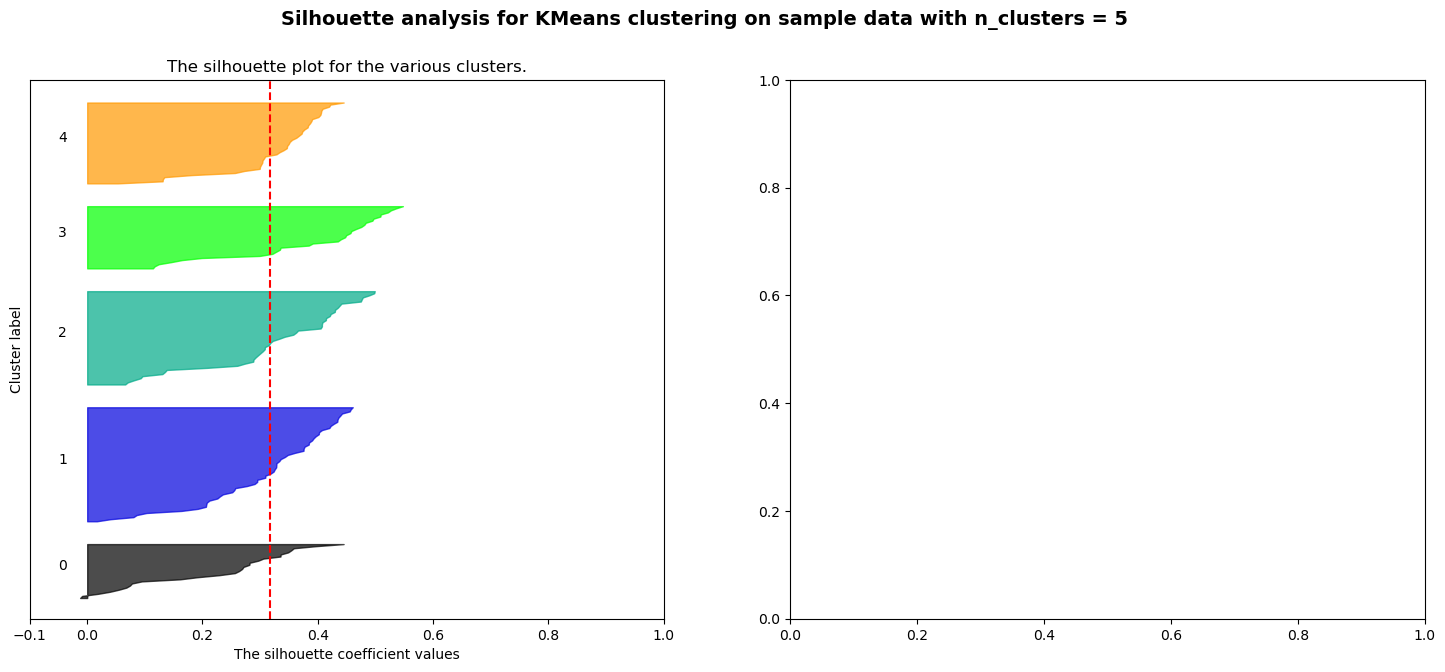

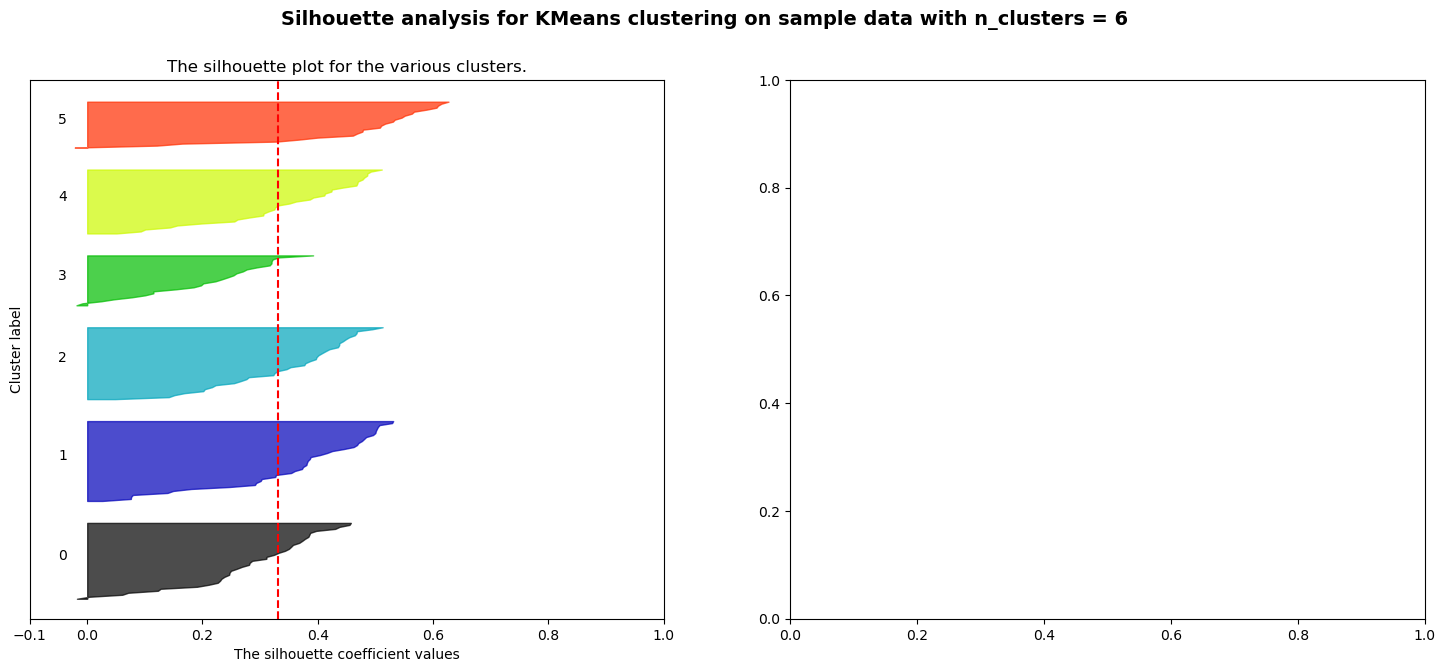

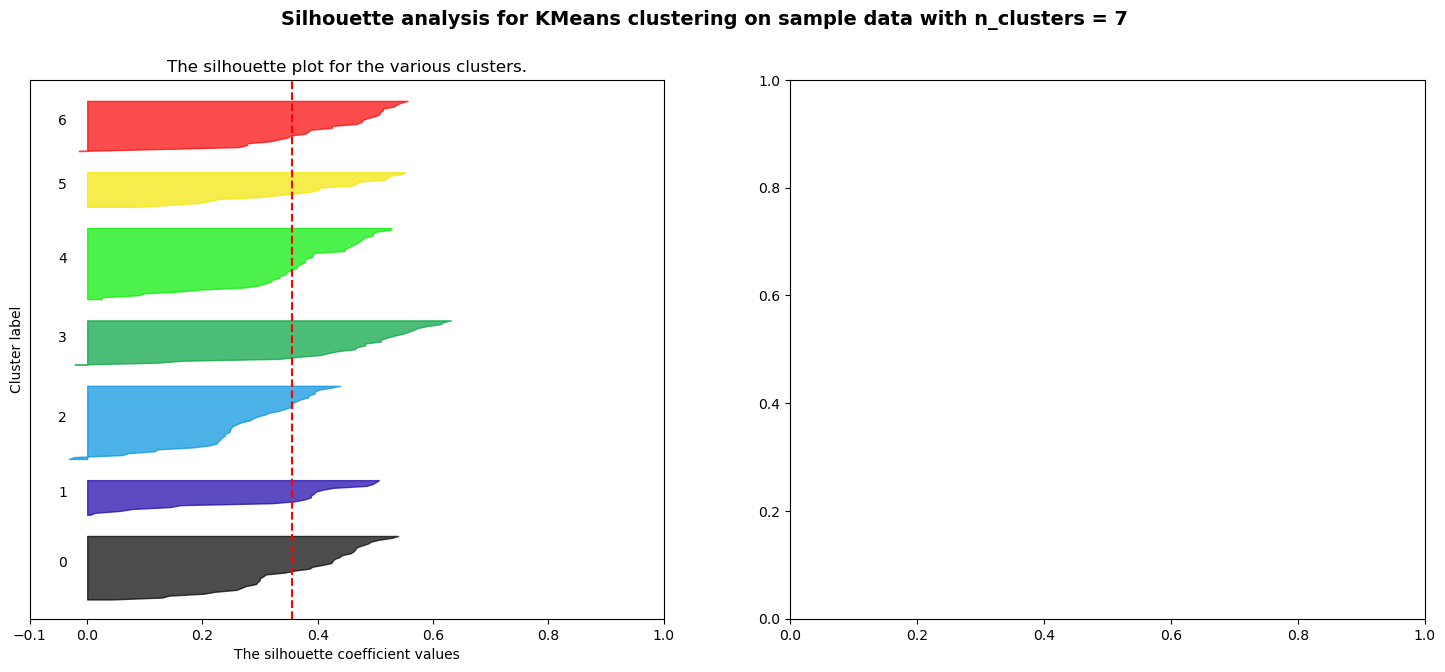

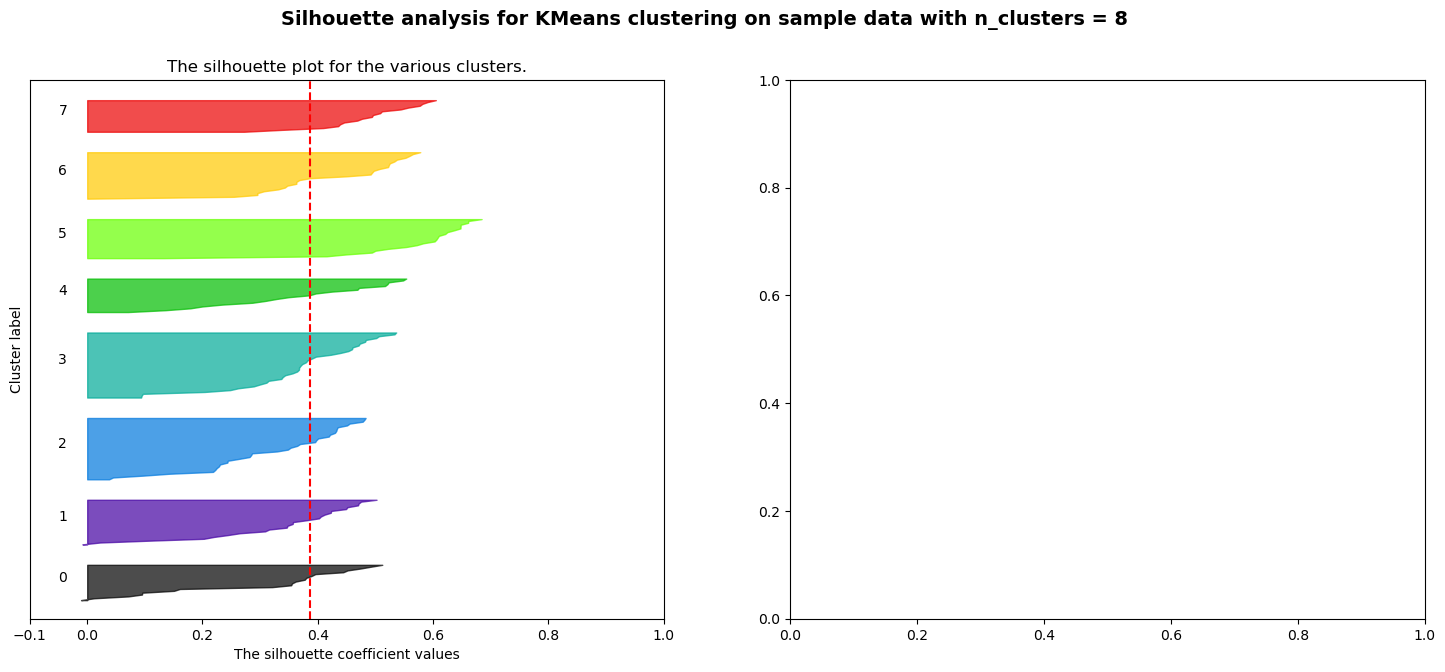

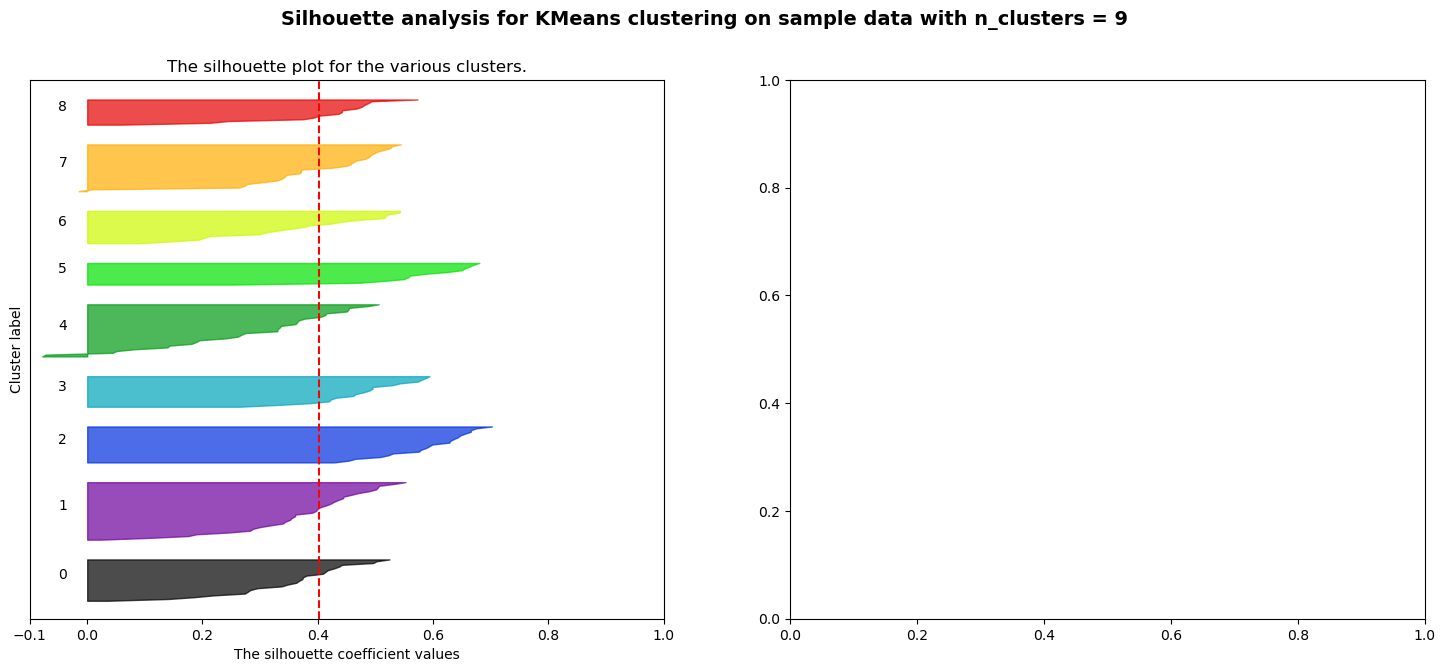

In [20]:
X = df_scaled
for n_clusters in range(2,10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### From the graphical representation, the 6 clusters has one with silhoutte score going negative, though we can get the optimal clusters from elbow curve, we need to check with thw silhoutte score, this says that 4 clusters is perfect for this dataset.

In [22]:
kmm = KMeans(n_clusters=4)
y_pred = kmm.fit_predict(df_scaled)

In [23]:
df['cluster'] = y_pred

In [24]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]
df5 = df[df['cluster']==3]

In [26]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,1
3,0,23,16,77,3
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,1
197,1,32,126,74,0
198,1,32,137,18,2
